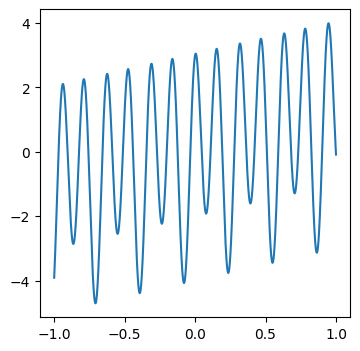

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4, 4]

# experiment in stability of inverting frequency domain (0-inf) -> (inf to 0) as a way to have DNN learn high frequency features first

f = lambda x: np.sin(20*x) + 3*np.cos(40*x) + x
x = np.linspace(-1,1,10000)
plt.plot(x,f(x))

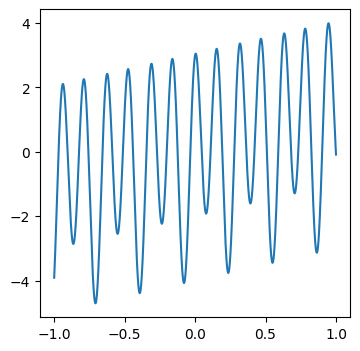

In [9]:
# DFT
def dft(x):
    N = len(x)
    X = np.fft.fft(x)
    return X

def idft(x):
    # inverse DFT
    N = len(x)
    X = np.fft.ifft(x)
    return X

d = dft(f(x))
plt.plot(x,idft(d))

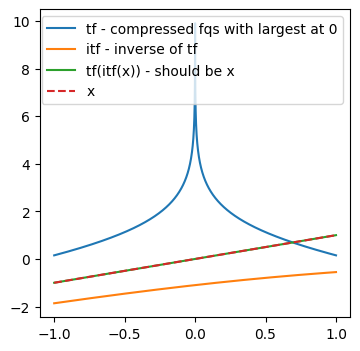

In [50]:
sigmoid = lambda x: 1/(1+np.exp(-x))
logit = lambda x: np.log(x/(1-x))

forward = sigmoid
backward = logit

# forward = lambda x: x 
# backward = lambda x: x

def tf(f):
    f = -abs(f) # if sigmoid is used for forward
    u = 2*forward(f) - 1
    u2 = u - np.sign(u)
    return backward(u2)

# inv function of tf
def itf(u):
    u2 = forward(u)
    u3 = u2 - np.sign(u2)
    return backward((u3+1)/2)

plt.plot(x,tf(x), label='tf - compressed fqs with largest at 0') 
plt.plot(x,itf(x), label='itf - inverse of tf')
plt.plot(x,tf(itf(x)), label='tf(itf(x)) - should be x')
plt.plot(x,x, label='x', linestyle='--')
plt.legend()

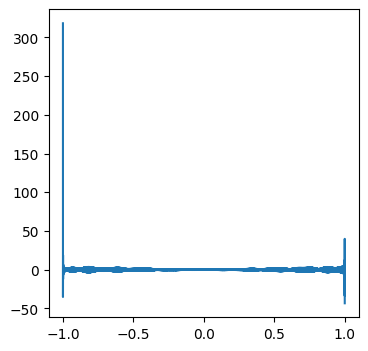

In [11]:
d = dft(f(x))
ftf = np.interp(itf(x), x, d)
plt.plot(x,idft(ftf))
ftf2 = np.interp(tf(x),x, ftf)


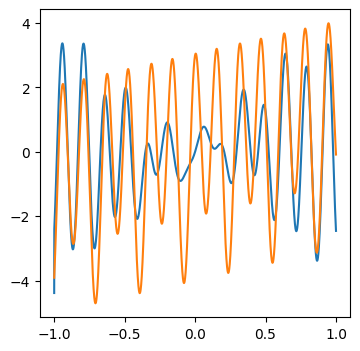

In [12]:
plt.plot(x,idft(ftf2))
plt.plot(x,f(x))

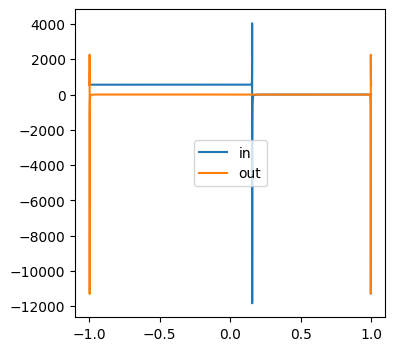

In [13]:
plt.plot(x,ftf, label='in')
plt.plot(x,ftf2, label='out')
plt.legend()

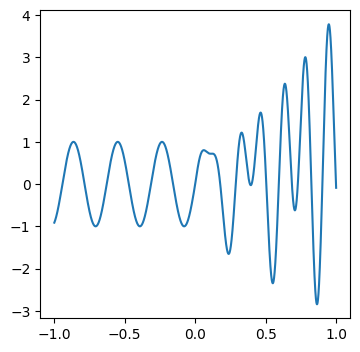

In [55]:
relu = lambda x: np.maximum(x,0)
f = lambda x: np.sin(20*x) + relu(x)*(3*np.cos(40*x) + x)
x = np.linspace(-1,1,10000)
plt.plot(x,f(x))

/home/mitt-wsl/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


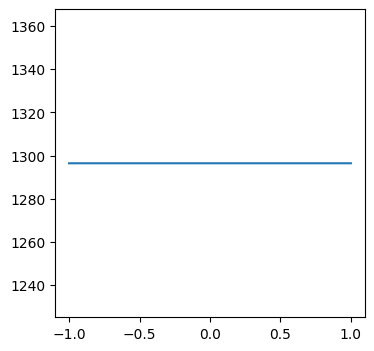

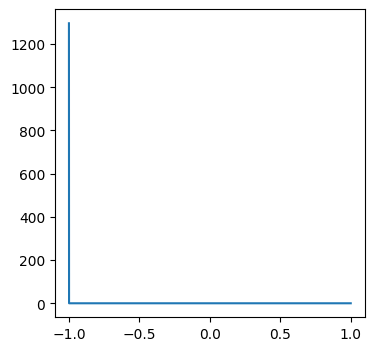

In [56]:
d = dft(f(x))
# x -> np.sign(x)*(1-abs(x))
d2 = np.interp(x+5, x, d)
plt.plot(x,d2)
plt.show()
X = idft(d2)
plt.plot(x,X)

(-1.0, 1.0)

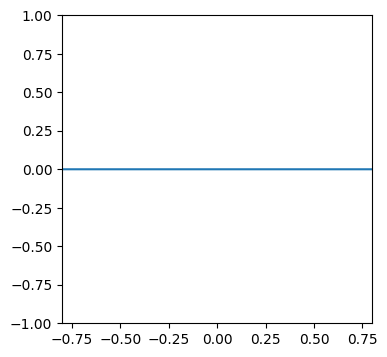

In [57]:
d3 = np.interp(x-5, x, dft(X))
plt.plot(x,idft(d3))
plt.xlim(-0.8,0.8)
plt.ylim(-1,1)